In [1]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('SciencePlots-APS.mplstyle')

## Bandstructure modules

In [2]:
import numpy as np

def read_band(fname, VBM, CBM, EFermi=0):
    band_pw = np.loadtxt(fname)
    EF = (CBM + VBM) / 2.0 if EFermi == 0 else EFermi
    kDist = np.unique(band_pw[:, 0])
    numBand = len(band_pw[band_pw[:, 0] == kDist[1]])
    BandsPW = (np.reshape(band_pw[:, 1], (-1, len(kDist))).T) - EF
    return kDist, BandsPW

def bandgap(kDist, BandsPW, NumOccupied):
    bands = BandsPW
    VBM, CBM = max(bands[:, NumOccupied]), min(bands[:, NumOccupied+1])
    kVBM = kDist[np.where(bands[:, NumOccupied] == VBM)][0]
    kCBM = kDist[np.where(bands[:, NumOccupied+1] == CBM)][0]
    gap = CBM - VBM
    BandGapData = [kVBM, kCBM, VBM, CBM, gap]
    print('| k-VBM | k-CBM | VBM (eV) | CBM (eV) | Egap (eV) |')
    print('| {:.3f} | {:.3f} | {:.3f}   | {:.3f}    | {:.3f}     |'.format(*BandGapData))
    print('=> Direct Gap' if kVBM == kCBM else '=> Indirect Gap')
    return BandGapData

## GaAs

In [3]:
# read band GaAs
kDistGaAs, BandGaAs = read_band('../GaAs/bands/GaAs.bands.gnu',0.0, 0.0, 5.2647)

# high-symmetry point from prefix.band.out
kNodeGaAs = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])

# labels of nodes from prefix.nscfband.in
labelGaAs = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')

# Number of occupied states (from *.nscf.out)
NumOccupiedGaAs = 3            # 4th band

BandGapGaAs = bandgap(kDistGaAs, BandGaAs, NumOccupied=NumOccupiedGaAs)

| k-VBM | k-CBM | VBM (eV) | CBM (eV) | Egap (eV) |
| 0.000 | 0.000 | 0.071   | 1.086    | 1.016     |
=> Direct Gap


## GaSb

In [4]:
# read band GaAs
kDistGaSb, BandGaSb = read_band('../GaSb/bands/GaSb.bands.gnu', 0.0, 0.0, 4.8896)

# high-symmetry point from prefix.band.out
kNodeGaSb = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])

# labels of nodes from prefix.nscfband.in
labelGaSb = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')

# Number of occupied states (from *.nscf.out)
NumOccupiedGaSb = 3            # 4th band

BandGapGaSb = bandgap(kDistGaSb, BandGaSb, NumOccupied=NumOccupiedGaSb)

| k-VBM | k-CBM | VBM (eV) | CBM (eV) | Egap (eV) |
| 0.000 | 0.000 | 0.078   | 0.631    | 0.554     |
=> Direct Gap


## InAs

In [5]:
# read band GaAs
kDistInAs, BandInAs = read_band('../InAs/bands/InAs.bands.gnu', 0.0, 0.0, 4.1548)

# high-symmetry point from prefix.band.out
kNodeInAs = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])

# labels of nodes from prefix.nscfband.in
labelInAs = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')

# Number of occupied states (from *.nscf.out)
NumOccupiedInAs = 3            # 4th band

BandGapInAs = bandgap(kDistInAs, BandInAs, NumOccupied=NumOccupiedInAs)

| k-VBM | k-CBM | VBM (eV) | CBM (eV) | Egap (eV) |
| 0.000 | 0.000 | 0.057   | 0.266    | 0.209     |
=> Direct Gap


## InP

In [6]:
# read band GaAs
kDistInP, BandInP = read_band('../InP/bands/InP.bands.gnu', 0.0, 0.0, 4.3555)

# high-symmetry point from prefix.band.out
kNodeInP = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])

# labels of nodes from prefix.nscfband.in
labelInP = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')

# Number of occupied states (from *.nscf.out)
NumOccupiedInP = 3            # 4th band

BandGapInP = bandgap(kDistInP, BandInP, NumOccupied=NumOccupiedInP)

| k-VBM | k-CBM | VBM (eV) | CBM (eV) | Egap (eV) |
| 0.000 | 0.000 | 0.055   | 1.295    | 1.240     |
=> Direct Gap


## Plot bandstructures

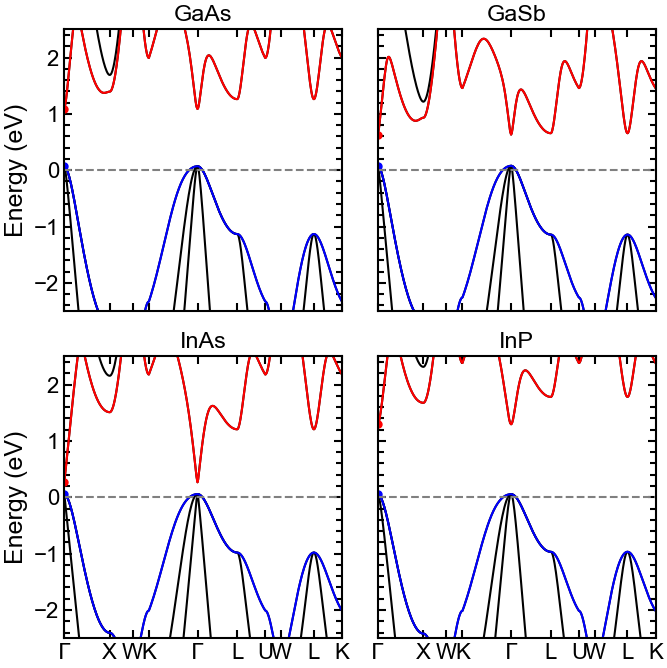

In [7]:
# set up figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# ----------------------------------#
# plot GaAs
# ----------------------------------#
for i in range(0, BandGaAs.shape[1]):
    axes[0,0].plot(kDistGaAs, BandGaAs[:, i], color='black')
axes[0,0].plot(kDistGaAs, BandGaAs[:, NumOccupiedGaAs], color='blue', lw=1.5)
axes[0,0].plot(kDistGaAs, BandGaAs[:, NumOccupiedGaAs+1], color='red', lw=1.5)
axes[0,0].plot(BandGapGaAs[0], BandGapGaAs[2], 'bo', markersize=5)
axes[0,0].plot(BandGapGaAs[1], BandGapGaAs[3], 'ro', markersize=5)

# Fermi level
axes[0,0].axhline(0, color='gray', ls='--', lw=1.5)

# X-Axis
axes[0,0].set_xlim(kNodeGaAs[0], kNodeGaAs[-1])
axes[0,0].set_xticks(kNodeGaAs)
axes[0,0].set_xticklabels(labelGaAs)
axes[0,0].tick_params(axis='x', which='minor', bottom=False, top=False)

# Y-Axis
axes[0,0].set_ylim(-2.5, 2.5)
axes[0,0].set_ylabel('Energy (eV)')
axes[0,0].set_title(r'GaAs')

# ----------------------------------#
# plot GaSb
# ----------------------------------#
for i in range(0, BandGaSb.shape[1]):
    axes[0,1].plot(kDistGaSb, BandGaSb[:, i], color='black')
axes[0,1].plot(kDistGaSb, BandGaSb[:, NumOccupiedGaSb], color='blue', lw=1.5)
axes[0,1].plot(kDistGaSb, BandGaSb[:, NumOccupiedGaSb+1], color='red', lw=1.5)
axes[0,1].plot(BandGapGaSb[0], BandGapGaSb[2], 'bo', markersize=5)
axes[0,1].plot(BandGapGaSb[1], BandGapGaSb[3], 'ro', markersize=5)

# Fermi level
axes[0,1].axhline(0, color='gray', ls='--', lw=1.5)

# X-Axis
axes[0,1].set_xlim(kNodeGaSb[0], kNodeGaSb[-1])
axes[0,1].set_xticks(kNodeGaSb)
axes[0,1].set_xticklabels(labelGaSb)
axes[0,1].tick_params(axis='x', which='minor', bottom=False, top=False)

# Y-Axis
axes[0,1].set_ylim(-2.5, 2.5)
axes[0,1].set_title(r'GaSb')

# ----------------------------------#
# plot InAs
# ----------------------------------#
for i in range(0, BandInAs.shape[1]):
    axes[1,0].plot(kDistInAs, BandInAs[:, i], color='black')
axes[1,0].plot(kDistInAs, BandInAs[:, NumOccupiedInAs], color='blue', lw=1.5)
axes[1,0].plot(kDistInAs, BandInAs[:, NumOccupiedInAs+1], color='red', lw=1.5)
axes[1,0].plot(BandGapInAs[0], BandGapInAs[2], 'bo', markersize=5)
axes[1,0].plot(BandGapInAs[1], BandGapInAs[3], 'ro', markersize=5)

# Fermi level
axes[1,0].axhline(0, color='gray', ls='--', lw=1.5)

# X-Axis
axes[1,0].set_xlim(kNodeInAs[0], kNodeInAs[-1])
axes[1,0].set_xticks(kNodeInAs)
axes[1,0].set_xticklabels(labelInAs)
axes[1,0].tick_params(axis='x', which='minor', bottom=False, top=False)

# Y-Axis
axes[1,0].set_ylim(-2.5, 2.5)
axes[1,0].set_ylabel('Energy (eV)')
axes[1,0].set_title(r'InAs')

# ----------------------------------#
# plot InP
# ----------------------------------#
ax = axes[1,1]
for i in range(0, BandInP.shape[1]):
    axes[1,1].plot(kDistInP, BandInP[:, i], color='black')
axes[1,1].plot(kDistInP, BandInP[:, NumOccupiedInP], color='blue', lw=1.5)
axes[1,1].plot(kDistInP, BandInP[:, NumOccupiedInP+1], color='red', lw=1.5)
axes[1,1].plot(BandGapInP[0] , BandGapInP[2], 'bo', markersize=5)
axes[1,1].plot(BandGapInP[1] , BandGapInP[3], 'ro', markersize=5)

# Fermi level
axes[1,1].axhline(0, color='gray', ls='--', lw=1.5)

# X-Axis
axes[1,1].set_xlim(kNodeInAs[0], kNodeInAs[-1])
axes[1,1].set_xticks(kNodeInAs)
axes[1,1].set_xticklabels(labelInAs)
axes[1,1].tick_params(axis='x', which='minor', bottom=False, top=False)

# Y-Axis
axes[1,1].set_ylim(-2.5, 2.5)
axes[1,1].set_title(r'InP')

plt.tight_layout()

# save figure
fig.savefig('./imag/groupIII-V-bands.svg')

plt.show()